In [ ]:
import json
from collections import Counter
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径
j1 = "/root/ftg/results/tokencls_agnews_on_imdb.json"
j2 = "/root/ftg/results/tokencls_agnews.json"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 200

def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with open(jsonl_file, "r", encoding="utf-8") as f:
        result = json.load(f)
        for line in result:
            data.append(line[0])  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["ig_gold"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 0)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter


import matplotlib.pyplot as plt


def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(j1)
coordinates_file2 = extract_coordinates(j2)

# Count occurrences in both files
counter_file1 = Counter(coordinates_file1)
counter_file2 = Counter(coordinates_file2)
# counter_file1 = filter_counter(counter_file1)
counter_file2 = filter_counter(counter_file2)
scatter_plot(counter_file1)
scatter_plot(counter_file2)

# Find duplicates between the two files
total_coordinates_combined = set(counter_file1) | set(counter_file2)
duplicate_coordinates = set(counter_file1) & set(counter_file2)
complement_1 = set(counter_file1) - set(counter_file2)
complement_2 = set(counter_file2) - set(counter_file1)

duplicate_count = len(duplicate_coordinates)

total_coordinates_file1 = len(set(counter_file1))
total_coordinates_file2 = len(set(counter_file2))
total_coordinates_combined = len(total_coordinates_combined)
total_complement_1 = len(complement_1)
total_complement_2 = len(complement_2)

# Calculate duplicate ratios
duplicate_ratio_file1 = (
    duplicate_count / total_coordinates_file1 if total_coordinates_file1 > 0 else 0
)
duplicate_ratio_file2 = (
    duplicate_count / total_coordinates_file2 if total_coordinates_file2 > 0 else 0
)
duplicate_ratio_combined = (
    duplicate_count / total_coordinates_combined
    if total_coordinates_combined > 0
    else 0
)
# 绘制带有重复点标记的散点图

scatter_plot(counter_file1, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file2, highlight_duplicates=duplicate_coordinates)
scatter_plot(counter_file1, highlight_duplicates=complement_1)
scatter_plot(counter_file2, highlight_duplicates=complement_2)
# 将集合转换为列表，因为 JSON 不支持集合
complement_1_list = list(complement_1)
complement_2_list = list(complement_2)

# 写入 JSON 文件
with open("complement_1.json", "w", encoding="utf-8") as f:
    json.dump(complement_1_list, f, ensure_ascii=False, indent=4)
# 写入 JSON 文件
with open("complement_2.json", "w", encoding="utf-8") as f:
    json.dump(complement_2_list, f, ensure_ascii=False, indent=4)

print("写入完成！")

# Print results
print(f"Total coordinates in file 1: {total_coordinates_file1}")
print(f"Total coordinates in file 2: {total_coordinates_file2}")
print(f"Duplicate coordinates between files: {duplicate_count}")
print(f"Difference coordinates_1: {total_complement_1}")
print(f"Difference coordinates_2: {total_complement_2}")
print(f"Ratio of duplicates (file 1): {duplicate_ratio_file1:.2%}")
print(f"Ratio of duplicates (file 2): {duplicate_ratio_file2:.2%}")
print(f"Ratio of duplicates (combined): {duplicate_ratio_combined:.2%}")

13166
2304
34560


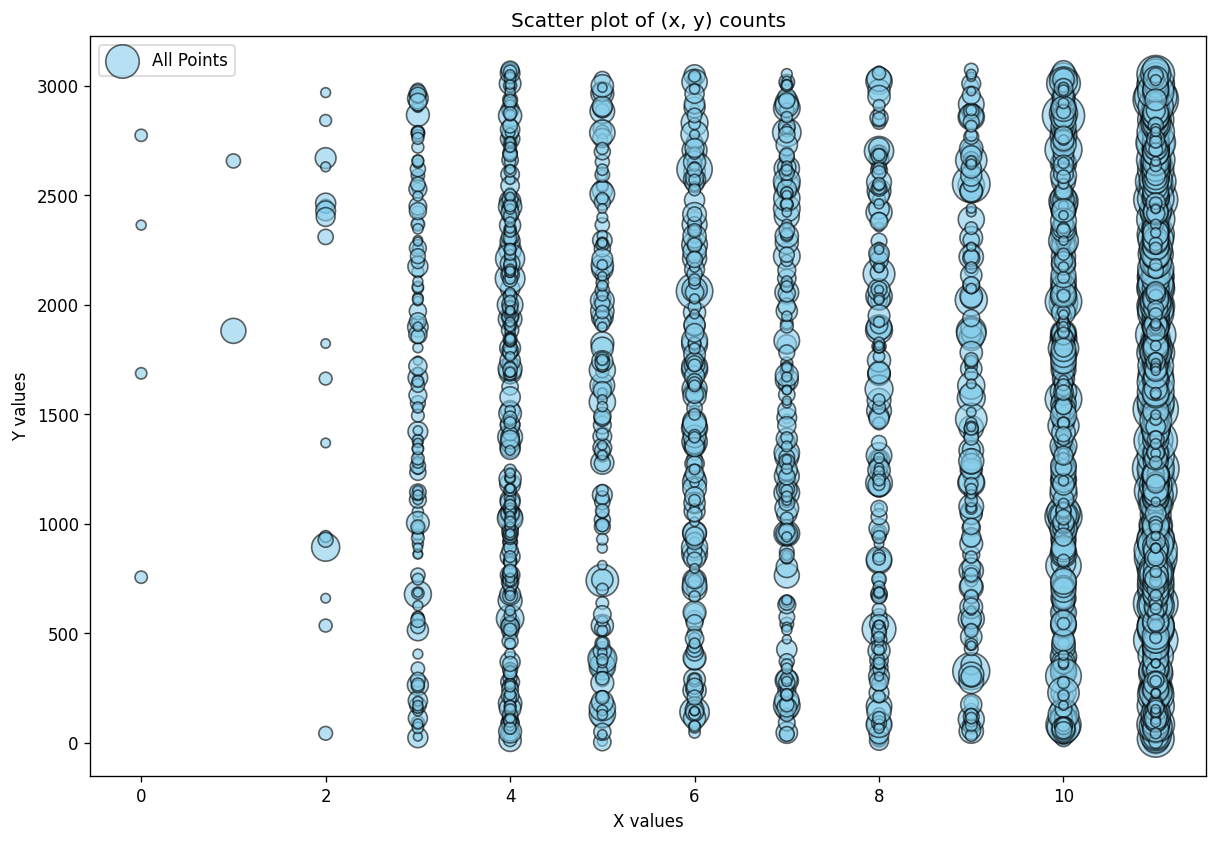

In [8]:
import json
from collections import Counter
# from src.module.func import scatter_plot, plot_points

# 在 Jupyter 中交互式输入文件路径
j1 = "/root/ftg/results/tokencls_agnews.json"
# j1 = input("请输入第一个 JSONL 文件的路径: ")
# j2 = input("请输入第二个 JSONL 文件的路径: ")
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.dpi"] = 120
full_c = [(x,y) for x in range(0,12) for y in range(0,3072)]
full_c = Counter(full_c)
def extract_coordinates(jsonl_file):
    """Extract coordinates from a JSONL file."""
    data = []
    with open(jsonl_file, "r", encoding="utf-8") as f:
        result = json.load(f)
        for line in result:
            data.append(line[0])  # Parse each JSON line

    # Extract coordinates
    coordinates = []
    for entry in data:
        coordinates.extend([(item[0], item[1]) for item in entry["ig_gold"]])
    return coordinates


def filter_counter(counter_obj):
    # 计算平均值
    mean_value = int(sum(counter_obj.values()) / len(counter_obj))
    threshold = int(mean_value * 1)
    # threshold = int(mean_value * 0.1)
    # 过滤元素
    filtered_counter = {
        key: value for key, value in counter_obj.items() if value >= threshold
    }

    return filtered_counter

def scatter_plot(counter_obj, highlight_duplicates=None):
    x = [key[0] for key in counter_obj.keys()]
    y = [key[1] for key in counter_obj.keys()]
    sizes = [value * 0.1 for value in counter_obj.values()]  # 调整点大小以反映计数

    plt.scatter(
        x, y, s=sizes, alpha=0.6, color="skyblue", edgecolor="black", label="All Points"
    )

    # Highlight duplicate points if provided
    if highlight_duplicates:
        dup_x = [key[0] for key in highlight_duplicates]
        dup_y = [key[1] for key in highlight_duplicates]
        plt.scatter(dup_x, dup_y, s=1, alpha=0.9, color="red", label="Duplicates")

    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Scatter plot of (x, y) counts")
    plt.legend()
    plt.show()


# Extract coordinates from both files
coordinates_file1 = extract_coordinates(j1)

# Count occurrences in both files
counter_file1 = Counter(coordinates_file1)
print(len(counter_file1))

# counter_file1 = filter_counter(counter_file1)
# print(len(counter_file1))
complement_2 = set(full_c) - set(counter_file1)
print(len(complement_2))

# counter_file2 = filter_counter(counter_file2)
scatter_plot(counter_file1)
counter_file1_list = list(counter_file1)
with open("complement_1.json", "w", encoding="utf-8") as f:
    json.dump(counter_file1_list, f, ensure_ascii=False, indent=4)